# Sales forecast for computer games for 2017


## Scenario

An online shop is selling computer games all over the world. The shop would like to know which games will be popular next year and plan marketing campaigns accordingly. There is open source information about historical sales data over years, customer rates, critics rates, genres and game platforms. Based on this data it's needed to find patterns that indentify the success of the game.   


The dataset contains information until 2016. We pretend it's December 2016 and we are planning the campaign for 2017. 

### 1. Analysis of dataset
### 2. Preparation of data
   
### 3. Exploratory Data Analysis


#### 3.1 Games releases over the years  
How many games were produced in different years?  
#### 3.2 Platform life cycle  
How long does a platform live?  
#### 3.3 Global sales by platform  
Which platforms have been leading in sales, growing or falling?   
#### 3.4 Rating influence on sales  
How does feedback from users and critics affect sales within one popular platform?     
#### 3.5 Genres  
What are the most profitable genres?  

### 4. User portrait of each region

 For users of each region (NA, EU, JP):

   - Most popular platforms (top 5)
   - The most popular genres (top 5)
   - ESRB rating per region

### 5. Hypothesis testing

   - The average user ratings for Xbox One and PC platforms are the same;
   - Average user ratings of Action and Sports genres are different.

### 6. Results and recommendations

## 1. Analysis of the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'medium',
          'figure.figsize': (14, 7),
         'axes.labelsize': 'medium',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)


# plt.rcParams.update(plt.rcParamsDefault)
import seaborn as sns
import numpy as np
import math
import random
from scipy import stats as st

pd.set_option('mode.chained_assignment', None)

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The year must be converted into integers, 
user's rating to numerical values.

In [5]:
# Determine the ratio of missing values

for col in games.columns:
    pct_missing = np.mean(games[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

Name - 0.012%
Platform - 0.0%
Year_of_Release - 1.609%
Genre - 0.012%
NA_sales - 0.0%
EU_sales - 0.0%
JP_sales - 0.0%
Other_sales - 0.0%
Critic_Score - 51.319%
User_Score - 40.09%
Rating - 40.479%


Approximately 2% of the data is missing from the values of the year.
A large amount of data is omitted in critical ratings (51%), user ratings (40%) and ESRB ratings (40%).

## 2. Preparation of data


In [6]:
# Rename the columns
games.columns = games.columns.str.lower()

In [7]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
games.query('year_of_release == "NaN"')['name'].count()

269

In [9]:
# Delete 1.6% of the data, 269 lines, where the year is missing
games = games.dropna(subset=['year_of_release'])

In [10]:
games[games['year_of_release'] == np.nan]['year_of_release'].count()

0

In [11]:
print(games['year_of_release'].min())
print(games['year_of_release'].max())

1980.0
2016.0


In [12]:
games['year_of_release'].value_counts().sort_index().sum()

16446

In [13]:
games['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
21.0      1
13.0      1
17.0      1
Name: critic_score, Length: 81, dtype: int64

In [14]:
#  tdb - to be determined means that this rating does not exist yet. Can be replaced by NaN
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
1.1       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [15]:
games[games['user_score'] == "tbd"]['user_score'].count()/len(games)

0.14447282013863552

In [16]:
games.loc[games['user_score'] =="tbd",'user_score'] = np.nan

In [17]:
games['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
0.2      2
0.7      2
0.9      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64

In [18]:
# The year must be converted into an integer. User's ratings to numerical values.
games['year_of_release'] = games['year_of_release'].astype(int)

games['user_score'] = games['user_score'].astype(float)


In [19]:
# Add a column with total sales for all regions

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [20]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


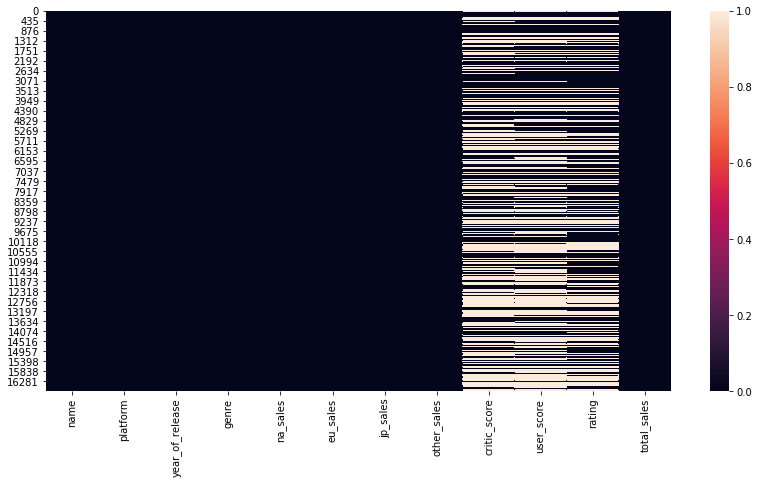

In [21]:
# Since the dataset has a small number of features, it makes
# sense to build a heat diagram and visualise the missed values
# plt.figure(figsize=(20,20))
sns.heatmap(games.isnull())

In [22]:
games['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [23]:
# Determine the ratio of missing values

for col in games.columns:
    pct_missing = np.mean(games[col].isnull())

    print('{} - {}%'.format(col, round(pct_missing*100,3)))

name - 0.012%
platform - 0.0%
year_of_release - 0.0%
genre - 0.012%
na_sales - 0.0%
eu_sales - 0.0%
jp_sales - 0.0%
other_sales - 0.0%
critic_score - 51.459%
user_score - 54.621%
rating - 40.606%
total_sales - 0.0%


In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


There are 16715 points of data on video games released between 1980 and 2016.

There is a user rating "tbd" - to be determined, which means that the rating has not yet been determined.
This data has been replaced by NaN, which has increased the number of missing values in user ratings by 14% to 54%.

The year has been converted to an integer. The user rating has been converted to a numerical value (float).

The rows without a year have been removed as they were less than 2% of the sample. 

There are a lot of missing values in user and critics ratings (51-54%), but it has been decided not to fill them. Apparently there was no information in the sources about the ratings of some games. It is possible that these are not interesting games, or games of previous years. It is not known by what criteria they can be filled in without distorting the result.

A column has been added with total sales for all regions.


## 3. Exploratory Data Analysis

### 3.1 Games releases over the years

In [25]:
quantity = (games
            .pivot_table(index='year_of_release',values='name',aggfunc='count')
            .reset_index()
            .rename(columns={'name':'total_games'}))

In [26]:
quantity.head(5)

,year_of_release,total_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


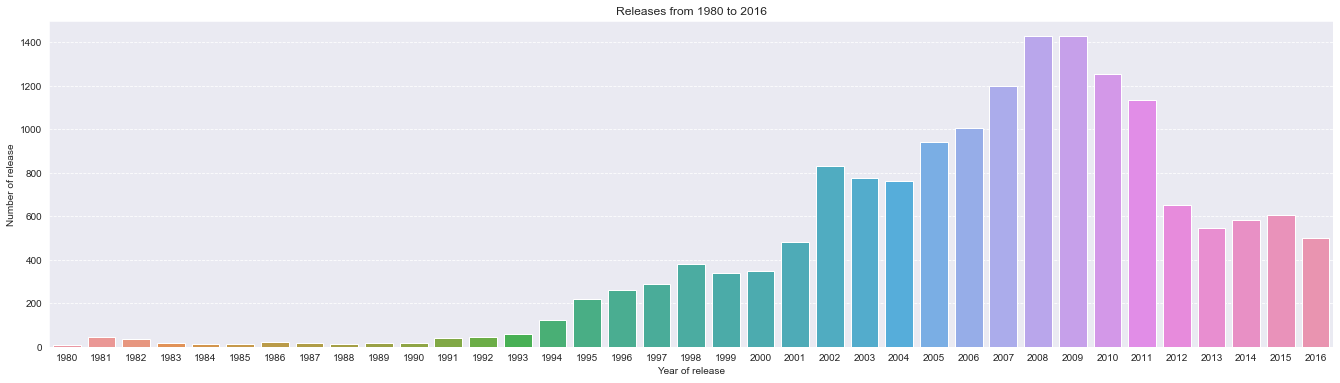

In [27]:
sns.set_style('darkgrid', {'grid.linestyle':'--'})
plt.figure(figsize=(23,6))
sns.barplot(x='year_of_release', y='total_games',data=quantity)
plt.title('Releases from 1980 to 2016')
plt.xlabel('Year of release')
plt.ylabel('Number of release')
print()

In this dataset the number of releases from 1980 to 1993 was consistently low: less than 50 per year. However, since 1994, the number of games released per year has started to grow. Between 1994 and 2002 the number of releases doubled every four years, with some slack in between. Since 2004, the number of releases reached almost 800, with a peak of just over 1,400 releases in 2008-2009, followed by a period of decline, with releases in 2012 falling particularly sharply by half compared to 2011. Between 2012 and 2016, the number of games released has stayed relatively stable at 550-600 games per year.

When planning to choose the most popular product, one should rely on the current period 2012-2015. The data for 2016 is not complete and will not be taken into account.

### 3.2 Platform life cycle

In [28]:
platform = (games
            .pivot_table(index='platform',values='total_sales',aggfunc='sum')
            .sort_values(by='total_sales',ascending=False))
platform.head(3)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34


In [29]:
top_6_sales = platform.query('total_sales > 700')
top_6_index = top_6_sales.index
top_6_sales.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [30]:
platform_sales= (games
                 .pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum')
                 .reset_index())

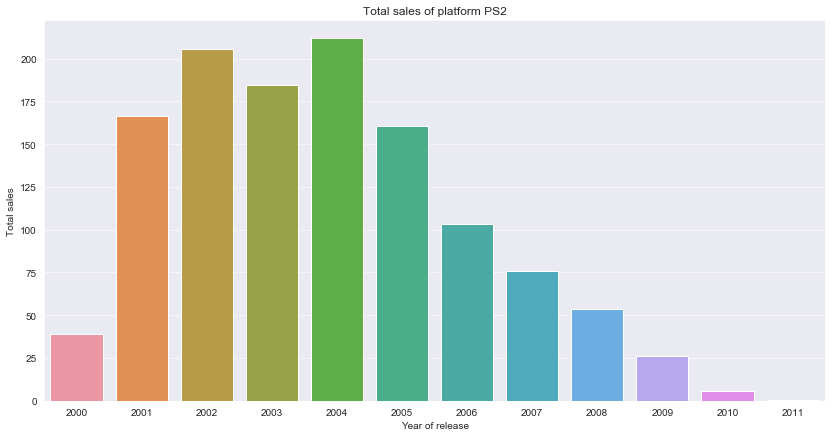

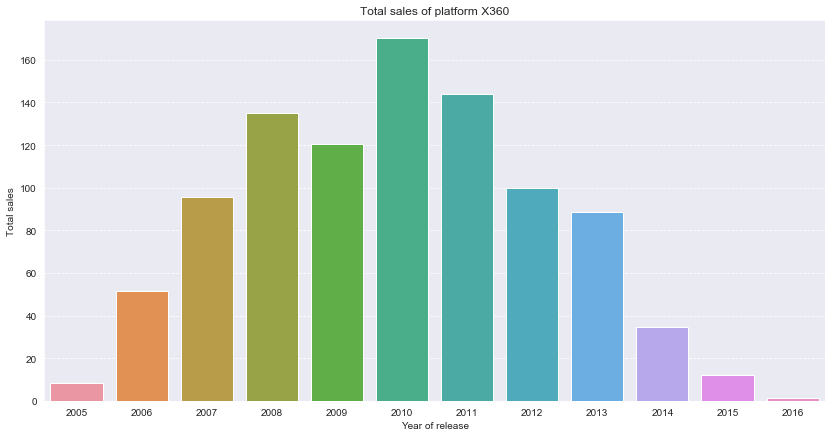

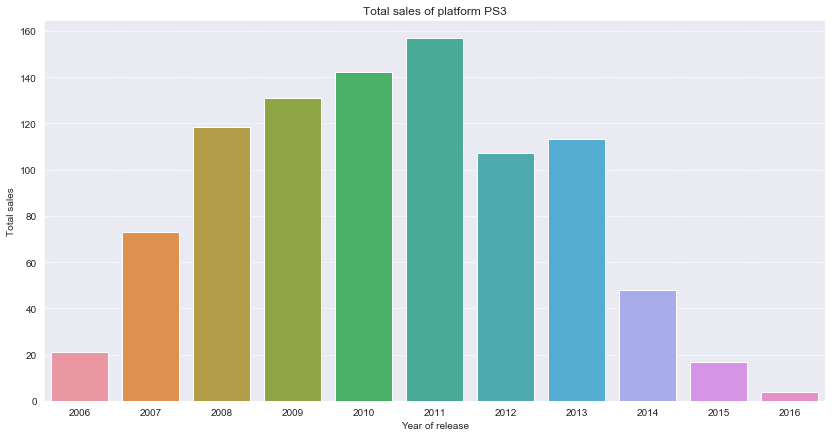

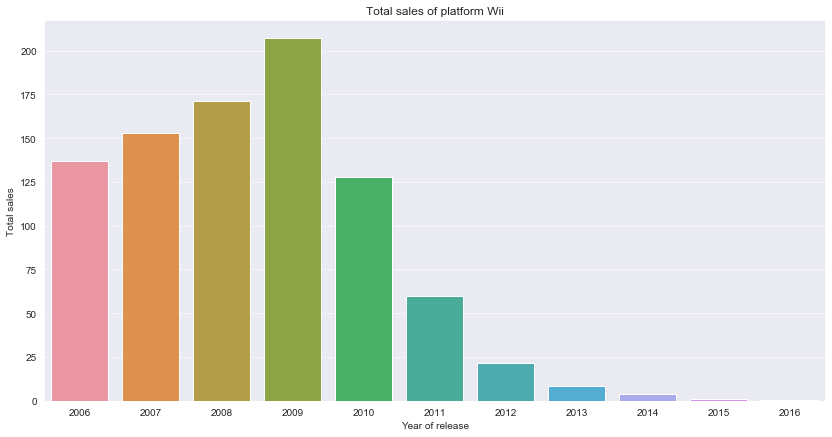

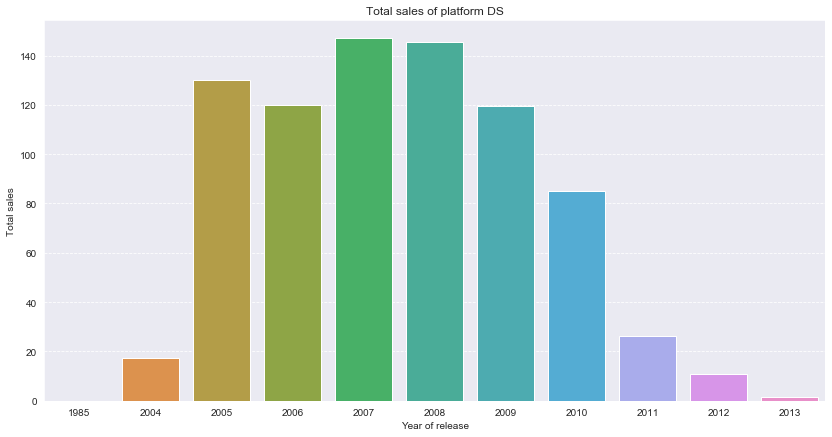

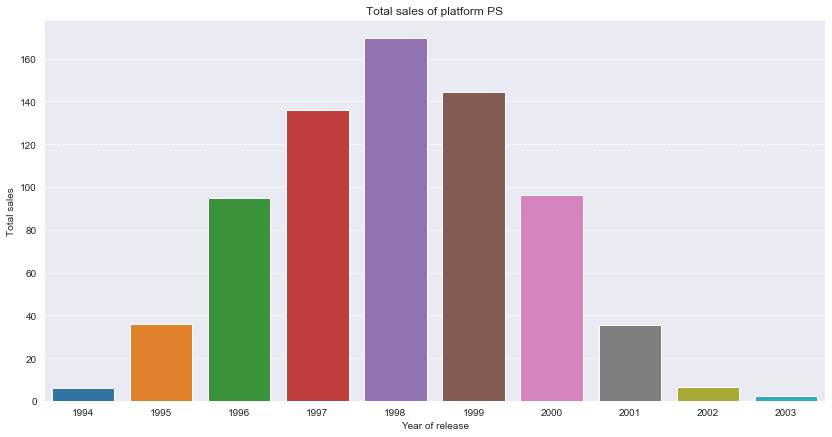

In [31]:
for item in top_6_sales.index:
    data = platform_sales.query('platform == @item')
    plt.figure()
    sns.barplot(x='year_of_release', y='total_sales',data=data)
    plt.title('Total sales of platform '+ item)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    print(' ')

The life span of a platform is roughly 10 years. And in the period of 3-7 years one can notice maximum sales. Usually in first 1-2 years the sales are minimal, with a sharp jump for the next 2-3 years, which either remains at the same level or increases. The peak of sales is at  years 6 or 7. 
After that sales drop sharply by 2 or more times, leaving almost zero results in the last years of life.

Accordingly, for further analysis, we need a platform that is either incipient or at the peak of its life cycle. 
We will only select those platforms that are at peak or incipient by 2016.

In [32]:
# Find years of platform life
platform_life = (games
                 .pivot_table(index =['platform'],values = ['year_of_release'],aggfunc ={'year_of_release':[min,max]}))
platform_life.head(4)

year_of_release      
                     max   min
platform                      
2600                1989  1980
3DO                 1995  1994
3DS                 2016  2011
DC                  2008  1998

In [33]:
# Add calculation of platform's age on the market
platform_life['life_cycle'] = platform_life[('year_of_release','max')] - platform_life[('year_of_release','min')]
platform_life.columns.set_levels(['y_max','y_min','life_circle'],level=1,inplace=True)
platform_life.columns = platform_life.columns.droplevel(0)


In [34]:
# Find the most relevant, promising platforms. If the platform is 8 years old by 2016, 
# there is no point in taking it into account, the sales will only decrease.

platform_life.query('y_max == 2016 and life_circle < 8')

,y_max,y_min,life_circle
platform,,,
3DS,2016,2011,5
PS4,2016,2013,3
PSV,2016,2011,5
WiiU,2016,2012,4
XOne,2016,2013,3


In [35]:
# See platforms that lives 8 years and more.
platform_life.query('y_max == 2016 and life_circle >= 8')

,y_max,y_min,life_circle
platform,,,
PC,2016,1985,31
PS3,2016,2006,10
Wii,2016,2006,10
X360,2016,2005,11


There is one long-living platform (PC) that obviously breaks the general rule of dying after 10 years. 

The others are from the same family of platforms, the next version of which is gaining momentum, while these are living the last days.

Let's look at the sales of all 9 platforms between 2010 and 2015 to see the trend.

Text(0.5, 0, 'Year of release')

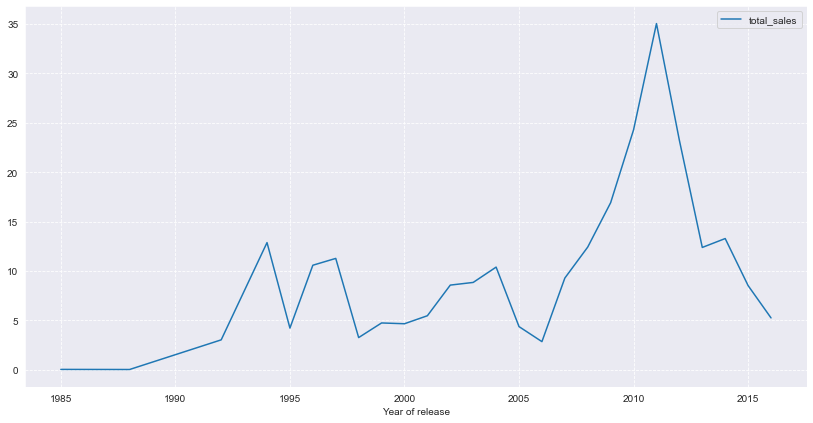

In [36]:
pc = (games
      .query('platform == "PC"')
      .pivot_table(index='year_of_release', values = 'total_sales',aggfunc = 'sum')
      .plot())
plt.xlabel('Year of release')

Platform PC has 5-10 year cicles.

In [37]:
# Let's take a look at 9 platform sales over the acutal period to make sure that the final candidates are correct

check_platforms = (games
                   .query('2010 <= year_of_release < 2016 and platform in ("PS4","WiiU","XOne","PC","3DS","PSV","PC","PS3","X360")')
                   .pivot_table(index='year_of_release',columns='platform',values = 'total_sales',aggfunc = 'sum'))
check_platforms

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
year_of_release,,,,,,,,
2010,NaN,24.28,142.17,NaN,NaN,NaN,170.03,NaN
2011,63.20,35.03,156.78,NaN,4.63,NaN,143.84,NaN
2012,51.36,23.22,107.36,NaN,16.19,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,10.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,16.35,11.96,60.14


Text(0.5, 0, 'Yeas of release')

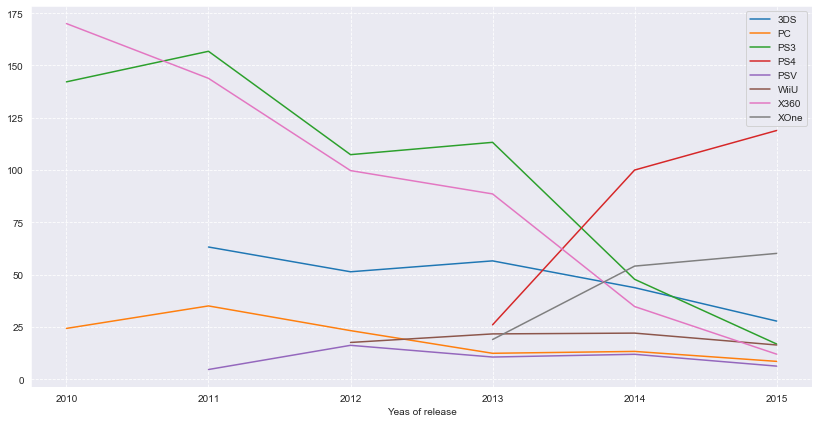

In [38]:
# Visualize the sales of 9 platforms
check_platforms.plot()
plt.legend(loc='upper right')
plt.xlabel('Yeas of release')
# plt.legend(prop={"size":15})

Sales leaders are the PS4 and XOne platforms. Their life cycle has just begun and by 2015 their sales were growing. These platforms are the most promising.

 
Sales of X360 and PS3 platforms have been falling rapidly since 2010. 3DS sales have been falling gradually since 2011, even though this is a new platform. 

Sales of the new WiiU platform were stable from 2012 to 2015. But the sales level was 5 times lower compared to the leaders.

The situation with PSV and PC platforms: slow decline, relatively low sales. 

Final version of potentially profitable platforms: 3DS, PS4, WiiU, XOne, PC.


### 3.3 Global sales by platform

In [39]:
# Take the potentially profitable platforms and the current period from 2012 to 2015 as defined above.

actual_games = games.query('platform in ("PS4","WiiU","XOne","PC","3DS") and 2012 <= year_of_release <= 2015')

In [40]:
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 31 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1067 non-null   object 
 1   platform         1067 non-null   object 
 2   year_of_release  1067 non-null   int64  
 3   genre            1067 non-null   object 
 4   na_sales         1067 non-null   float64
 5   eu_sales         1067 non-null   float64
 6   jp_sales         1067 non-null   float64
 7   other_sales      1067 non-null   float64
 8   critic_score     591 non-null    float64
 9   user_score       626 non-null    float64
 10  rating           636 non-null    object 
 11  total_sales      1067 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 108.4+ KB


In [41]:
# Find missing values

for col in actual_games.columns:
    pct_missing = np.mean(actual_games[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

name - 0.0%
platform - 0.0%
year_of_release - 0.0%
genre - 0.0%
na_sales - 0.0%
eu_sales - 0.0%
jp_sales - 0.0%
other_sales - 0.0%
critic_score - 44.611%
user_score - 41.331%
rating - 40.394%
total_sales - 0.0%


Text(0, 0.5, 'Platforms')

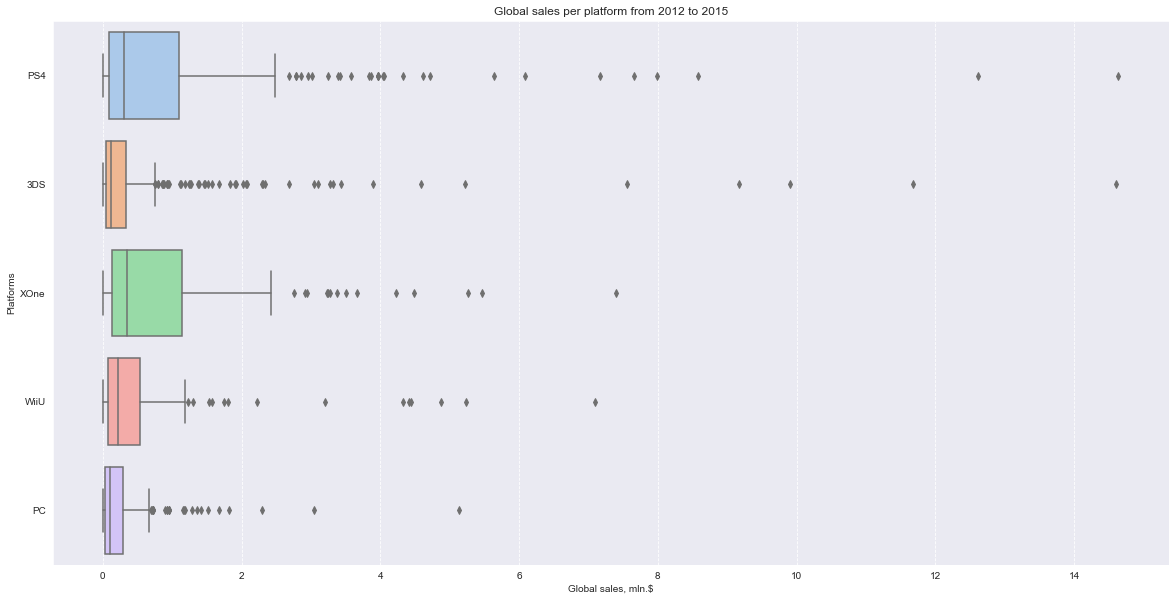

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x="total_sales", y="platform", data=actual_games, palette="pastel")
plt.title('Global sales per platform from 2012 to 2015')
plt.xlabel('Global sales, mln.$')
plt.ylabel('Platforms')


Text(0, 0.5, 'Platforms')

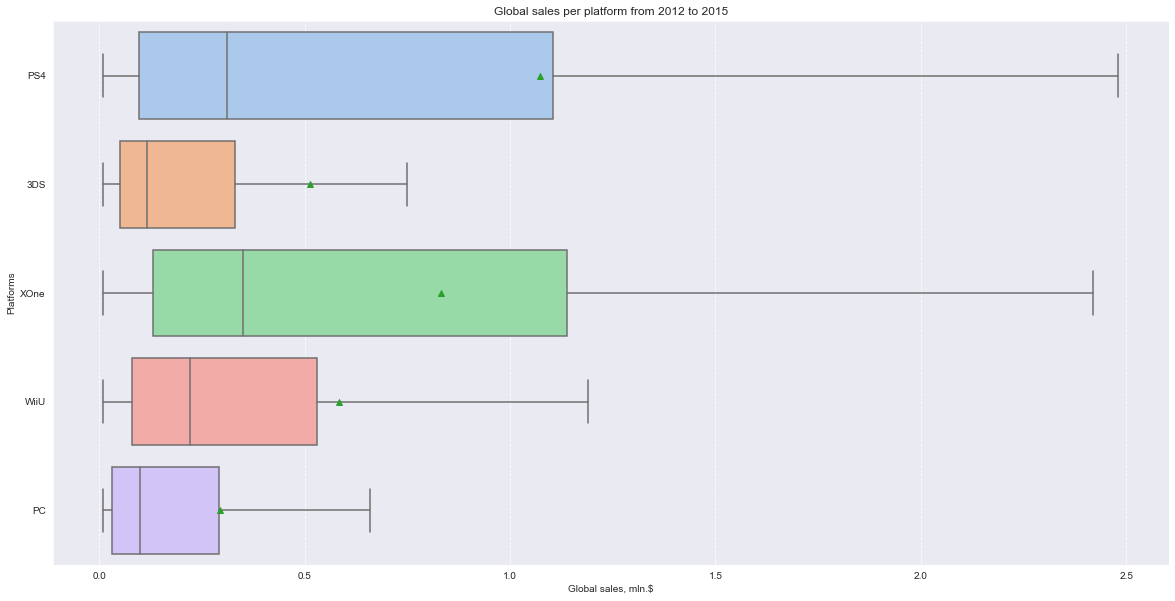

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(x="total_sales", y="platform", data=actual_games, palette="pastel",showfliers=False,showmeans=True)
plt.title('Global sales per platform from 2012 to 2015')
plt.xlabel('Global sales, mln.$')
plt.ylabel('Platforms')


There is a large spread of sales. Obviously, each platform has flagships that bring in excess profits. 
On PS4 and DS3 there are games that have brought in over 12 million and 14 million dollars. 

In [44]:
actual_games.query('total_sales > 4').sort_values(['name','platform','total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,5.14
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Text(0, 0.5, 'Game name')

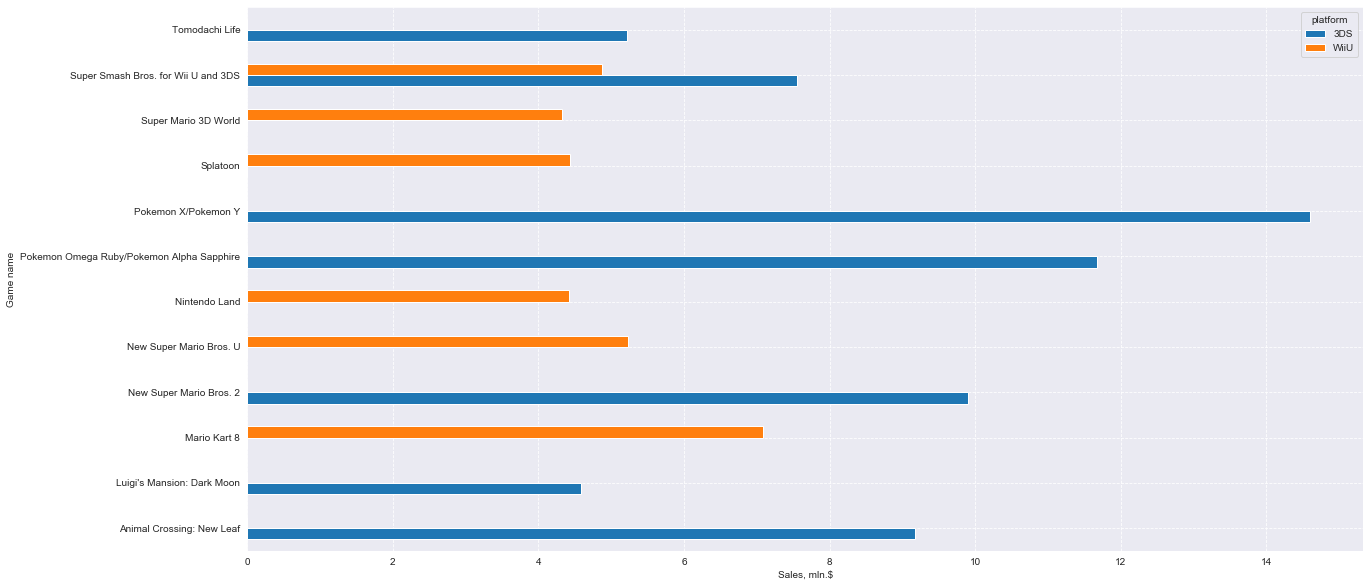

In [45]:
(actual_games
 .query('total_sales > 4 and platform in("WiiU","3DS")')
 .pivot_table(index='name',columns = 'platform', values='total_sales')
 .plot(kind='barh',figsize=(20,10)))
plt.xlabel('Sales, mln.$')
plt.ylabel('Game name')

Text(0, 0.5, 'Game name')

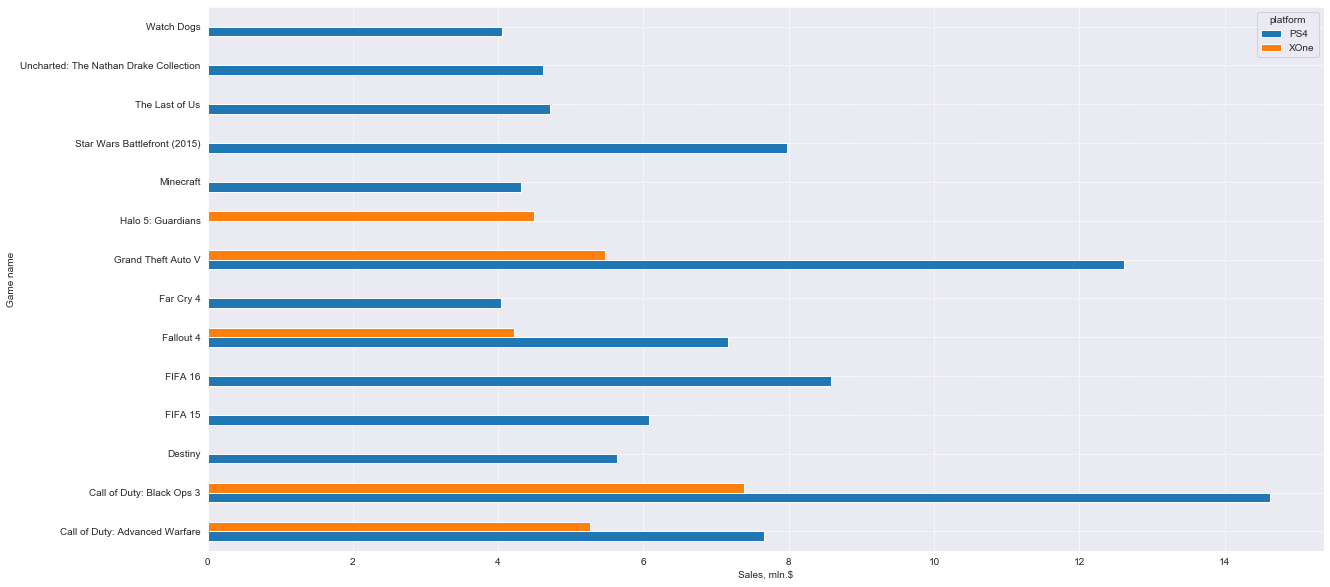

In [46]:
(actual_games
 .query('total_sales > 4 and platform in("PS4","XOne")')
 .pivot_table(index='name',columns = 'platform', values='total_sales')
 .plot(kind='barh',figsize=(20,10)))
plt.xlabel('Sales, mln.$')
plt.ylabel('Game name')

In [47]:

(actual_games
 .pivot_table(index='platform',values=['total_sales','name'],aggfunc = {'total_sales':['mean','median','sum'],'name':'count'})
 .sort_values(by=('total_sales','mean'),ascending=False))



name total_sales               
         count        mean median     sum
platform                                 
PS4        228    1.074079  0.310  244.89
XOne       160    0.832312  0.350  133.17
WiiU       133    0.583383  0.220   77.59
3DS        350    0.512771  0.115  179.47
PC         196    0.292857  0.100   57.40

The obvious rivals are PS4 and XOne and the WiiU and 3DS. There are games that come out on two platforms at once. For example, Call of Duty: Advanced Warfare, Call of Duty: Black Ops 3, Fallout 4, Grand Theft Auto V were released on PS4 and XOne, and sales on PS4 are always almost twice as high. 

Similarly to Wii U and 3DS, Super Smash Bros. for Wii U and 3DS sales are higher on 3DS. Similarly,  Mario games bring more revenue on the 3DS platform.


The sales leaders are PS4 and 3DS, next comes XOne. WiiU has 2.5 times less revenue than 2DS.

Competitors PS4 and XOne have different average sales, although not very much in a global scale ($200,000).

Competitors WiiU and 3DS have no differences in average revenue.


### 3.4 Rating influence on sales

In [48]:
ps4 = actual_games.query('platform == "PS4"') 
ps4['user_score']

31       NaN
42       8.3
77       4.3
87       NaN
92       5.7
        ... 
15556    NaN
15762    NaN
15943    NaN
16158    NaN
16398    NaN
Name: user_score, Length: 228, dtype: float64

Text(0, 0.5, 'Global sales, mln.$')

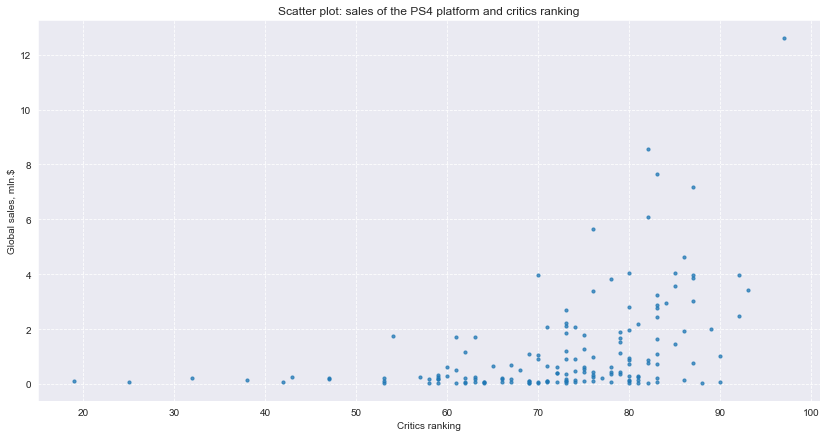

In [49]:
plt.figure()
plt.scatter(ps4['critic_score'], ps4['total_sales'], s = 10, alpha = 0.75)
plt.title('Scatter plot: sales of the PS4 platform and critics ranking')
plt.xlabel('Critics ranking')
plt.ylabel('Global sales, mln.$')

Text(0, 0.5, 'Global sales, mln.$')

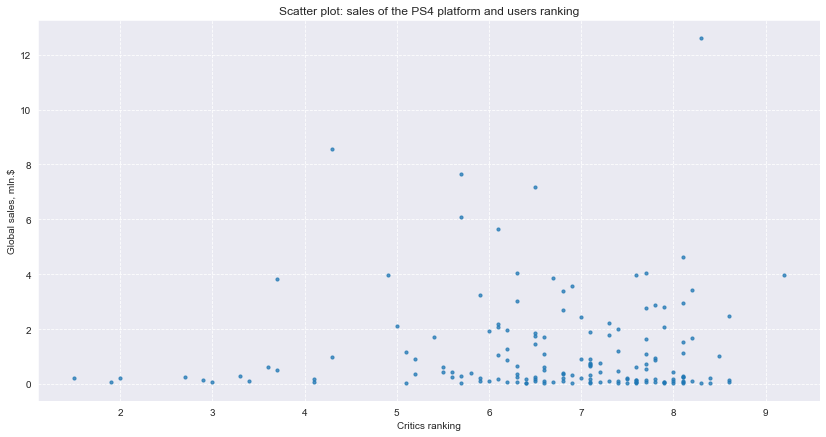

In [50]:
plt.figure()
plt.scatter(ps4['user_score'], ps4['total_sales'], s = 10, alpha = 0.75)
plt.title('Scatter plot: sales of the PS4 platform and users ranking')
plt.xlabel('Critics ranking')
plt.ylabel('Global sales, mln.$')

In [51]:
def scores(data,platform):
    '''
    Returns correlation table between sales and critics and users rankings
    
    '''
    print(platform)
    print(data.query('platform == @platform')[['total_sales','critic_score','user_score']].corr())
    print()
    

In [52]:
scores(actual_games,"PS4")
scores(actual_games,"PC")
scores(actual_games,"XOne")
scores(actual_games,"WiiU")
scores(actual_games,"3DS")


PS4
              total_sales  critic_score  user_score
total_sales      1.000000      0.431848    0.024231
critic_score     0.431848      1.000000    0.612451
user_score       0.024231      0.612451    1.000000

PC
              total_sales  critic_score  user_score
total_sales      1.000000      0.263157   -0.159228
critic_score     0.263157      1.000000    0.420645
user_score      -0.159228      0.420645    1.000000

XOne
              total_sales  critic_score  user_score
total_sales      1.000000      0.459385   -0.039268
critic_score     0.459385      1.000000    0.499502
user_score      -0.039268      0.499502    1.000000

WiiU
              total_sales  critic_score  user_score
total_sales      1.000000      0.354691    0.413265
critic_score     0.354691      1.000000    0.760811
user_score       0.413265      0.760811    1.000000

3DS
              total_sales  critic_score  user_score
total_sales      1.000000      0.333148    0.210567
critic_score     0.333148      1.000000

For PS4, XOne, WiiU and 3DS platforms, the correlation coefficient varies from 0.35 to 0.45, which indicates an average positive strength of correlation between critics' rankings and sales.

For the PC platform, the correlation coefficient is 0.26, which indicates a weak connection. It is likely that this platform has loyal fans who are not so affected by critical evaluations. There is a weak negative connection with user feedback. The PC is an unusual platform. 

In regards to  user ratings, all platforms except WiiU and 3DS have a weak correlations with sales.
For the WiiU and 3DS platform, the average and weak respectively positive correlations to user ratings is found.


In [53]:
actual_games[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.332515,0.081066
critic_score,0.332515,1.000000,0.531455
user_score,0.081066,0.531455,1.000000


### 3.5 Genres

In [54]:
actual_games['genre'].value_counts()

Action          388
Role-Playing    144
Sports           89
Shooter          87
Misc             86
Adventure        67
Platform         43
Racing           39
Simulation       37
Strategy         37
Fighting         30
Puzzle           20
Name: genre, dtype: int64

In [55]:
genre_sales = (actual_games
               .pivot_table(index = 'genre', values = 'total_sales',aggfunc = 'sum')
               .sort_values(by='total_sales',ascending= True))

genre_games = (actual_games
               .pivot_table(index = 'genre', values = 'name',aggfunc = 'count')
               .rename(columns={'name':'number_of_games'})
               .sort_values(by='number_of_games',ascending=True))


genre = genre_sales.join(genre_games, how='outer')
genre['ratio'] = genre['total_sales'] / genre['number_of_games']
genre.sort_values(by=['total_sales'], ascending=False)

,total_sales,number_of_games,ratio
genre,,,
Action,184.36,388,0.475155
Shooter,131.14,87,1.507356
Role-Playing,118.87,144,0.825486
Sports,72.00,89,0.808989
Platform,46.38,43,1.078605
Misc,36.31,86,0.422209
Simulation,29.39,37,0.794324
Racing,28.52,39,0.731282
Fighting,21.75,30,0.725000


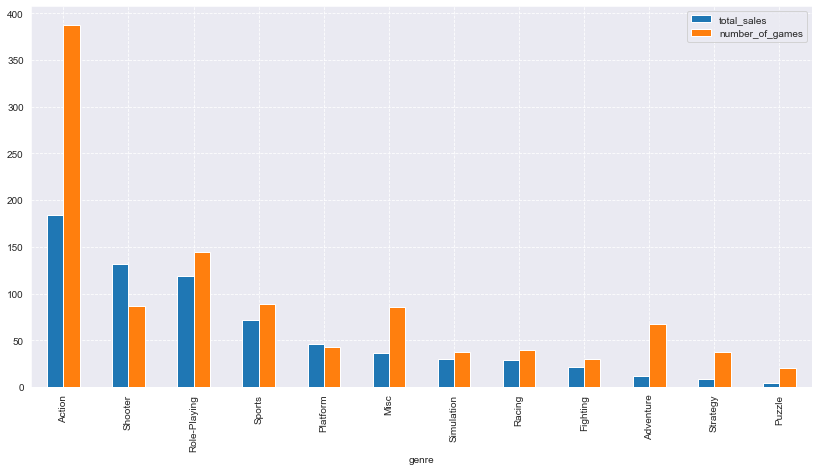

In [56]:
genre[['total_sales','number_of_games']].sort_values(by=['total_sales'], ascending=False).plot(kind='bar')

Over the period 2012-2015, the Action, Shooter, Sports and Role-Playing genres were the world leaders in terms of sales.

Most games were released in the Action and Role-Playing genres. However, the average return on the game is greater in the genres of Shooter and Platform. 


The genres of Puzzle, Strategy are not that profitable, and their average return is just as low. 
37 Strategy games have yielded 8.5 million, while the Simulation genre has yielded 29 million.

One should not expect top games from these genres, that will bring huge profits.


## 4. User portrait of each region

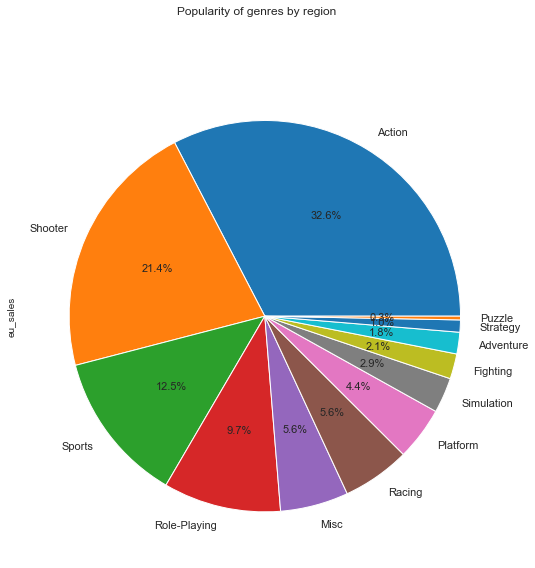

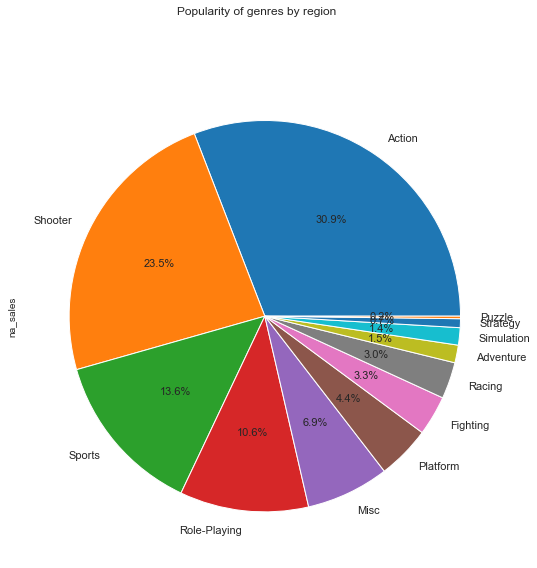

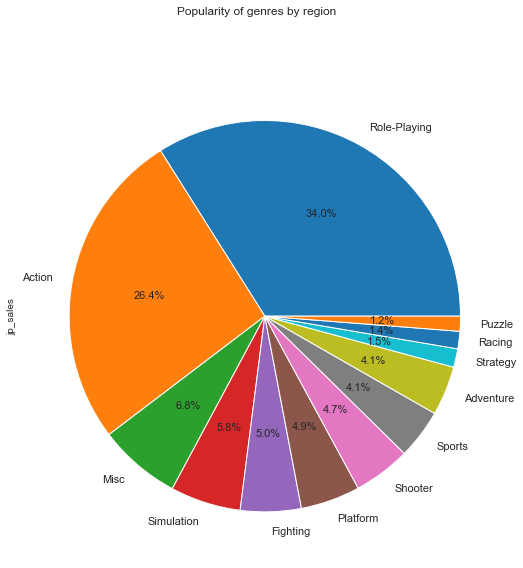

In [57]:
for region in ['eu_sales','na_sales','jp_sales']:
#     
    (games
     .query('2012 <= year_of_release <= 2015')
     .pivot_table(index='genre',values = region, aggfunc='sum')
     .sort_values(by= region,ascending=False)
     .plot(kind='pie',subplots=True,autopct='%1.1f%%',fontsize=11,legend=None,figsize=(9,9),title = 'Popularity of genres by region'))



The North American market is similar to the European market in terms of popularity of genres: Action and Shooter occupy 50% of the market, with Action being the more popular genre, followed by Sports, Role-playing and Misc.


While in Japan, the most popular genres are Role-playing and Action. They account for more than 50% of the market. This is followed by Misc.


The Action genre is popular in all markets and accounts for 25-30% of sales.

In Europe and America, they like to shoot more, also sports competitions and role-playing games.

Less aggressive games prevail in the Asian market: dancing, role-playing and no interest in sports.

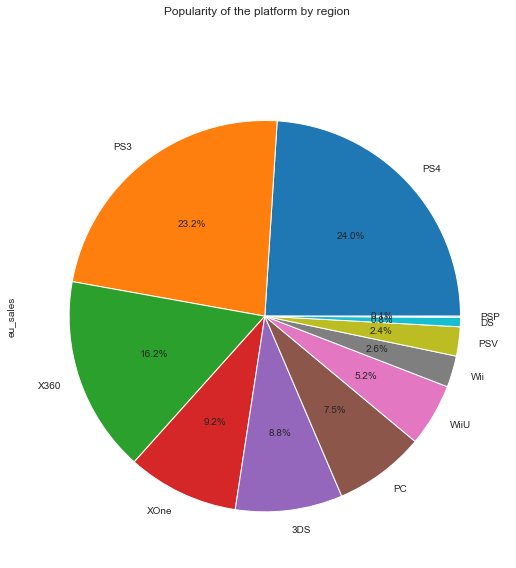

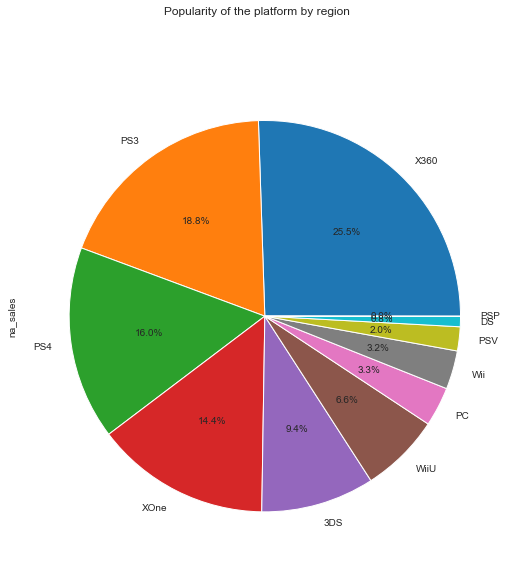

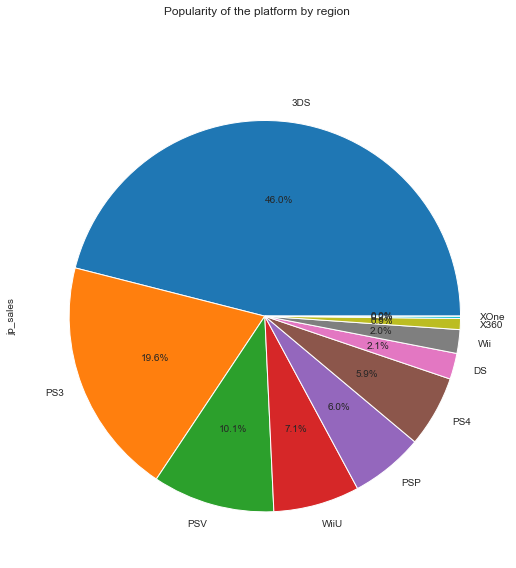

In [58]:
for region in ['eu_sales','na_sales','jp_sales']:

    (games
     .query('2012 <= year_of_release <= 2015')
     .pivot_table(index='platform',values = region, aggfunc='sum')
     .sort_values(by= region,ascending=False)
     .plot(kind='pie',subplots=True,autopct='%1.1f%%',legend=None,figsize=(9,9),title = 'Popularity of the platform by region'))


In Europe, PS and Xbox platforms account for almost 75% of the market, with PS3,PS4 being more popular and occupying almost half of the market. They are followed by XOne and X360, which account for 25% of the market. Approximately 8% are owned by 3DS.

In North America, almost 75% of the market belongs to PS and Xbox platforms in almost equal proportions. Approximately 9% is owned by 3DS.

In the Japanese market, as usual, everything is unique: the most popular platform, the 3DS, takes almost half of the market, followed by PS3, PS4 and PSV with about 30%. The Top 5 concludes the WiiU (7%) market.

PS platforms are more popular in the European market, Xbox and PS in the American, and 3DS is the undisputed leader in Japan. 

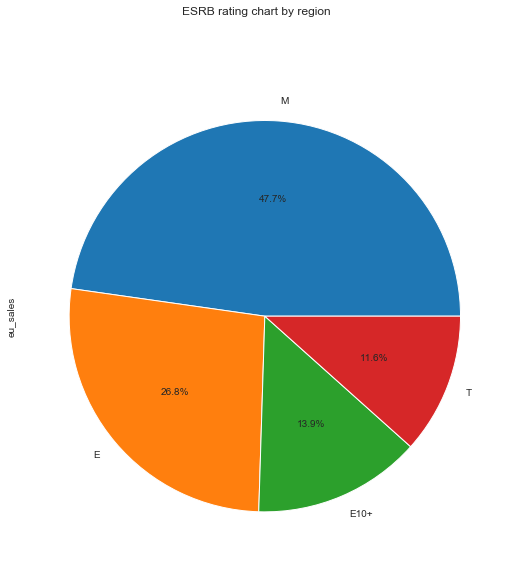

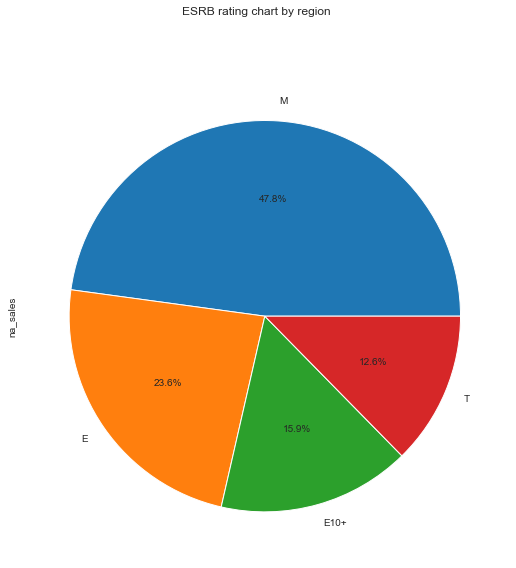

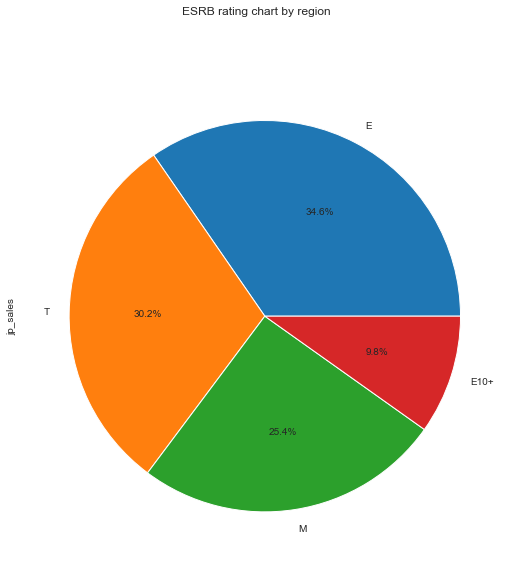

In [59]:
for region in ['eu_sales','na_sales','jp_sales']:

    (games
     .query('2012 <= year_of_release <= 2015') 
     .pivot_table(index='rating',values = region, aggfunc='sum')
     .sort_values(by= region,ascending=False)
     .plot(kind='pie',subplots=True,autopct='%1.1f%%',legend=None,figsize=(9,9),title = 'ESRB rating chart by region'))
    

Half of the North American and European markets are M rated games (adults, age 17+). These games may contain scenes of violence and foul language. The E-rating (for all ages) share is 20-25%. A quarter of the market is divided into E10 (children, age 10+) and T (adolescents, age 13+).

In Japan, 90% of the market is divided between games with an E,T and M rating approximately equally. Games with an E-rating have the highest share of sales.

In general, the ESRB rating does not affect sales, but rather characterises the markets. Since shooters and action games prevail in North America and Europe, the share of games with a 17+ rating is higher, respectively. While in Japan there are many calmer games, the share of games with an M rating is lower. 

In [60]:
# Market volume.
print(games.query('2010 <= year_of_release < 2016')['eu_sales'].sum())
print(games.query('2010 <= year_of_release < 2016')['jp_sales'].sum())
print(games.query('2010 <= year_of_release < 2016')['na_sales'].sum())
print(games.query('2010 <= year_of_release < 2016')['other_sales'].sum())



789.99
285.83
1085.48
253.0


#### User portrait of each region

***North America:***    
Popular genres: Action, Shooter (50% of the market), also Sports, Role-playing, Misc.  
Popular platforms: X360, PS3, PS4, Xone, 3DS   
Xbox platforms are the most popular   
Popular ESRB ratings: M (17+), E(All)   

***Europe:***  
Popular genres: Action, Shooter (50% of the market), also Sports, Role-playing, Misc.    
Popular platforms: PS3,PS4 (market 50%), X360,XOne, 3DS.  
PS platforms are more popular.  
Popular ESRB ratings: M (17+), E(All)  

***Japan:***  
Popular genres: Role-playing, Action (50% of the market), Misc.    
Popular platforms: 3DS (50% of the market), PS3, PSV, less than Wii  
The 3DS platform is the most popular  
Popular ESRB ratings: E (All), T(13+)  


## 5.  Hypotheses testing

### The average user ratings of Xbox One and PC platforms are the same

Let us formulate a null hypothesis using the equality sign, therefore:

- H0: Average user ratings for Xbox One and PC platforms are equal.
- H1: Average user ratings for Xbox One and PC platforms are not equal.

We have two independent samples (that the probability of selecting any subject in one sample is independent from the selection of any subject in the other sample). We will check their distribution.

In [61]:
score_xone = games.query('2012 <= year_of_release <= 2015 and platform == "XOne"')
score_pc = games.query('2012 <= year_of_release <= 2015 and platform == "PC"')

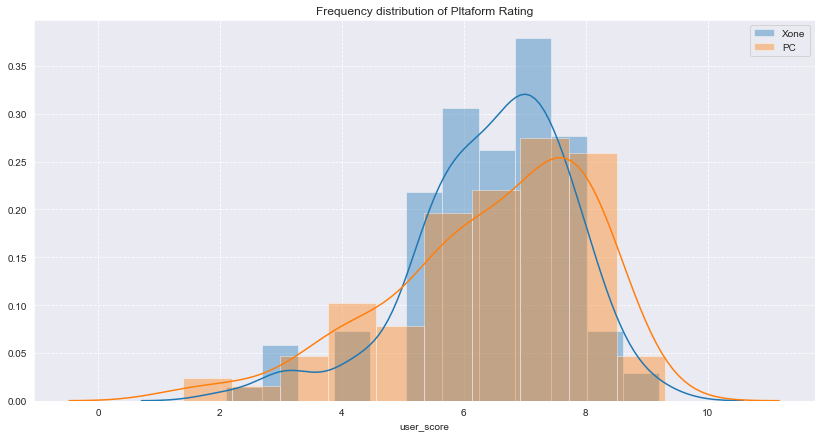

In [62]:
sns.distplot(score_xone['user_score'].dropna(how='all'))
sns.distplot(score_pc['user_score'].dropna(how='all'))
plt.title('Frequency distribution of Pltaform Rating')
plt.legend(['Xone','PC'])


The T-test implies two criteria: sampling independence and normal distribution. Although the second criterion is not met, the T-test was chosen to test the hypothesis. The number of observations in the samples is quite large, and the distribution slope is not very pronounced.

In [63]:
# Calculate sample dispersions

var_xone = np.var(score_xone['user_score'].dropna(how='all'), ddof=1)
print(var_xone)
var_pc = np.var(score_pc['user_score'].dropna(how='all'), ddof=1)
print(var_pc)

1.6594932533733138
2.710907608695652


In [64]:
# The dispersions of the two samples are not equal, so we use the parameter equal_var = False.

alpha = .05 

results = st.ttest_ind(
    score_xone['user_score'], 
    score_pc['user_score'],equal_var = False,nan_policy="omit")

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis.")
else:
    print("The null hypothesis could not be rejected")

p-value: 0.9441751855931794
The null hypothesis could not be rejected


Provided that in the general population average user ratings are equal, the probability of getting the difference that we observe is 94%. This is above the set statistical significance level of 5%. Therefore, we failed to reject the null hypothesis. 

We can't say anything about the average user ratings for Xbox and PC. They can be either equal or different.

### Average user ratings of Action and Sports genres are different.

Let us formulate a null hypothesis using the equality sign, therefore:

- H0: Average user ratings of Action and Sports genres are equal.
- H1: Average user ratings of Action and Sports genres are not equal.

In [65]:
action = games.query('2012 <= year_of_release <= 2015 and genre == "Action"')
sports = games.query('2012 <= year_of_release <= 2015 and genre == "Sports"')

In [66]:
print(action['user_score'].count())
print(sports['user_score'].count())

438
158


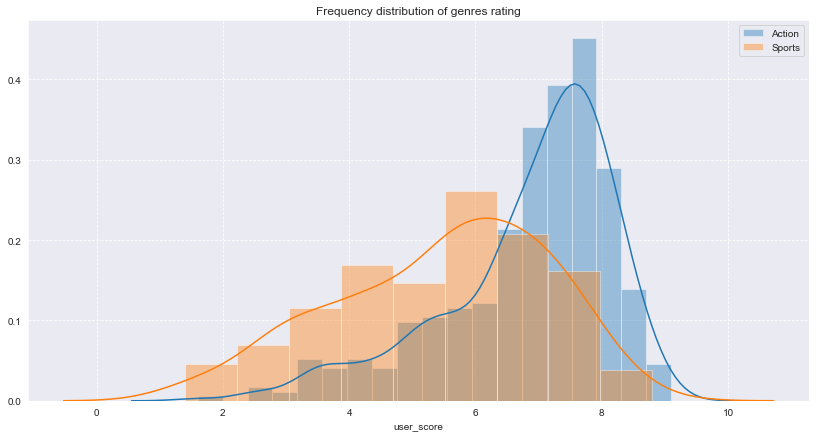

In [67]:
sns.distplot(action['user_score'].dropna(how='all'))
sns.distplot(sports['user_score'].dropna(how='all'))
plt.title('Frequency distribution of genres rating')
plt.legend(['Action','Sports'])

In [68]:
var_action = np.var(action['user_score'], ddof=1)
print(var_action)
var_sports = np.var(sports['user_score'], ddof=1)
print(var_sports)

1.831808198280096
2.780347093445134


In [69]:
alpha = .05 
results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],equal_var = False,nan_policy="omit")

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis.")
else:
    print("The null hypothesis could not be rejected")

p-value: 2.767130785663973e-18
Reject the null hypothesis.


## 6. Results and recommendations

### Data

There are 16715 lines of data on video games released between 1980 and 2016.
The data was pre-processed.


### Game market

Current period is established as 2012- 2015. The data for 2016 is incomplete.

The sales market is divided into 4 segments: North America, Japan, Europe and the rest. It is the largest market in North America (USD 1 billion), Europe (USD 0.78 billion), Japan and the Rest (USD 0.25 billion each).



### Platform selection

Life period of the platform is 10 years. 


**PS4 and XOne platforms are the most promising nascent platforms**. Their life cycle has just begun, and by 2015 their sales were growing. 

3DS sales have been falling since 2011, even though it's a new platform. 

Sales for the new WiiU platform were stable from 2012 through 2015. But the level of sales is 5 times less than in the leaders.
**WiiU is the least promising of the new platforms**.

It should be noted that the PC platform has been on the market for over 30 years and does not fall into the general category of average life. 
The PC platform should be taken into account, they have 5-10 year cycles and it seems that by 2016 cycle is complete and possible to grow.


### Platform Sales


The obvious rivals are the PS4 and XOne, and the WiiU and 3DS. 

There are games that come out on two platforms at once. 

For example, Call of Duty: Advanced Warfare,Call of Duty: Black Ops 3,Fallout 4,Grand Theft Auto V were released on PS4 and XOne, and sales on PS4 are always almost twice as high. 

As with Wii U and 3DS, Super Smash Bros. for Wii U and 3DS sales are higher on 3DS. Similar Mario games also bring more revenue to the 3DS platform.


**The PS4 and 3DS sales leaders, followed by XOne**. WiiU has 2.5 times less revenue than 3DS.

Competitors PS4 and XOne have a different average income, although not much ($200,000) globally.

The WiiU and 3DS competitors have the same average revenue.


### Ratings

For PS4, XOne, WiiU and3DS platforms, there is an average positive force of connection between critics' evaluations and sales.

If you take user ratings, the PS4 and XOne platforms have a weak link that can be exploited.
For the WiiU and 3DS platforms, the average positive correlation with user scores is negative and weak respectively.

For the PC platform the coefficient is 0.26, which characterizes the weak connection. Most likely this platform has loyal fans, for whom the ratings of critics are not that influential. There is a weak negative connection with user feedback. PC is an unusual platform. 

### Popular genres

***From 2012 to 2015, Action, Shooter, Sports, Role-Playing*** genres were leading in global sales.

Most games were released in the genre of Action and Role-Playing. 

However, the average return on the game is more in the genres of Shooter and Platform. 


The genres of Puzzle and Strategy are not that profitable and the average return from them is low. 
37 Strategy games have brought 8.5 million, while the same amount in Simulation genre brought in 29 million.

It is not necessary to expect from these genres top games, which will bring huge profits.

### Popular genres by region


***The Action genre is popular in all markets and accounts for 25-30% of sales***.

In Europe and America like to shoot more, sports competitions, role-playing games.

On the Asian market, less aggressive games prevail: dancing, role-playing, no interest in sports.

***The North American market is similar to the European market*** in terms of popularity of genres: Action and Shooter occupy 50% of the market, and Action is more popular genre, followed by Sports, Role-playing, Misc.

While in Japan, the most popular genres are Role-playing and Action. They account for more than 50%. Next comes Misc.


### Popular platforms by region


In Europe, almost 75% of the market is occupied by PS and Xbox platforms, with PS3 and PS4 being more popular and occupying almost half of the market. These are followed by XOne and X360 with a market share of 25%. Approximately 8% is owned by 3DS.

In North America, PS and Xbox platforms also account for almost 75% of the market in almost equal proportions. Approximately 9% is owned by 3DS.

In Japan, the most popular 3DS platform has almost half the market share, followed by PS3, PS4 and PSV with about 30%. The Top 5 concludes the WiiU (7%) market.

***PS is the most popular platform in Europe, Xbox and PS in the U.S., and 3DS is the undisputed leader in Japan***.

### The impact of ESRB rating by region


Half of the market in North America and Europe are games with a rating of M (adults, age 17 +). That is, these games may contain scenes of violence and foul language. On the rating E (for all ages) with 20-25% share. A quarter of the market is divided into E10 (children, age 10+) and T (adolescents, age 13+).

In Japan, 90% of the market is divided between games with a rating of E, T and M approximately the same. E-rated games have the highest share of sales.

***In general, the ESRB rather characterizes the markets***. Since North America and Europe is dominated by shooters and action games, the 17+ games have a larger share. While Japan has a lot of quieter games, the share of M rated games is lower. 

### Hypotheses

Two hypotheses were also tested:
 - The average user ratings for Xbox One and PC platforms are the same. The null hypothesis was not rejected, and in the end it is impossible to say whether they are the same or different.
 - The average user ratings of the Action and Sports genres are different. The null hypothesis was rejected and an alternative hypothesis was accepted that these ratings are different.

## Recommendations

Which games to buy and which advertising campaigns to launch depends on the budget. 

It is recommended to choose the most popular and promising product depending on the region.

Of the three markets, the North American market is the smallest. Next is Europe, then Japan.


***North America:***    
Genres: Action, Shooter, also Sports  
Promising platforms: PS4, Xone     
ESRB Ratings: M (17+), E(All)   
It is worth focusing on the evaluation of critics (average connection).

***Europe:***  
Genres: Action, Shooter, also Sports   
Forward looking platforms: PS4    
ESRB Ratings: M (17+), E(All)   
It is worth focusing on the evaluation of critics (average connection).

***Japan:***  
Genres: Role-playing, Action   
Forward looking platforms: 3DS  
Popular ESRB Ratings: E(All), T(13+)  
It is worth focusing on the evaluation of critics and users (average connection).

The WiiU platform, compared to the leaders, has a small share in all markets, despite its "youthfulness" and good average sales, for 4 years it has not managed to "take off" like other promising platforms.

Also, the PC platform is on the market for 30 years, has its own fans and a fairly stable income, a small share in the market of North America and Europe.